In [232]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix ,accuracy_score
from sklearn.metrics import precision_recall_fscore_support,average_precision_score
from sklearn.metrics import precision_score,recall_score,f1_score,precision_recall_curve

In [233]:
data = pd.read_csv("data.csv")

In [234]:
data.head(10)

,Name,Branch,Date,Brand,Category,Quantity,Price,TotalSales,BranchProximity,Festival/Offer,Actual Visits,Products Purchased,Visit day,VisitPossible/Not,Customer Type
0,KUMARESAN.T,Thiruvanmiyur,28-Jan-14,PREETHI,Mixie,1,"4,344","4,344",No,No,1,1,OneVisit,No,Bad
1,KARTHIKEYAN,Medavakkam,28-Jan-14,AKSHAYA,Grinder,1,2380.95,2380.95,No,No,1,2,SameDay,Yes,Good
2,S.RAJMOHAN,OMR,29-Jan-14,PREETHI,Mixie,1,2620.09,2620.09,No,No,1,1,OneVisit,No,Bad
3,VENKATARAMANI.M.S,Villivakkam,29-Jan-14,LG,Wash-Mac,1,16157.21,16157.21,No,No,1,1,OneVisit,No,Bad
4,ARUNKUMAR,Porur,29-Jan-14,PREETHI,Mixie,1,3100.44,3100.44,Yes,No,1,1,OneVisit,No,Bad
5,JEYACHANTRAN AR,Madippakkam,30-Jan-14,PRESTIGE,Gas-Stov,1,5109.17,5109.17,Yes,No,2,3,DiffDay,Yes,Good
6,PRASANA PRABHU,Medavakkam,30-Jan-14,WHIRLPOL,Wash-Mac,1,14192.14,14192.14,No,No,1,1,OneVisit,No,Bad
7,GEETHA.N,Old Washermenpet,30-Jan-14,PREETHI,Mixie,1,3100.44,3100.44,Yes,No,1,1,OneVisit,No,Bad
8,PARTHA SARATHI,Tambaram,31-Jan-14,STAND,StandHA2,1,285.71,285.71,No,No,1,1,OneVisit,No,Bad
9,MUTHU RAMALINGAM,Porur,31-Jan-14,LG,Wash-Mac,1,13580.79,13580.79,Yes,No,1,1,OneVisit,No,Bad


In [235]:
print ("Dataset Length: ", len(data))
print ("Dataset Shape: ", data.shape)

Dataset Length:  3154
Dataset Shape:  (3154, 15)


In [236]:
data.describe()

,Quantity,Actual Visits,Products Purchased
count,3154.000000,3154.000000,3154.000000
mean,14.690869,1.071021,1.429296
std,147.831055,0.313605,0.933693
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000
max,4940.000000,6.000000,14.000000


In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3154 entries, 0 to 3153
Data columns (total 15 columns):
Name                  3152 non-null object
Branch                3154 non-null object
Date                  3154 non-null object
Brand                 3154 non-null object
Category              3154 non-null object
Quantity              3154 non-null int64
Price                 3154 non-null object
TotalSales            3154 non-null object
BranchProximity       3154 non-null object
Festival/Offer        3154 non-null object
Actual Visits         3154 non-null int64
Products Purchased    3154 non-null int64
Visit day             3154 non-null object
VisitPossible/Not     3154 non-null object
Customer Type         3154 non-null object
dtypes: int64(3), object(12)
memory usage: 369.7+ KB


In [238]:
X= data[['Branch','Quantity','BranchProximity','Festival/Offer','Actual Visits','Products Purchased','Visit day','Customer Type']]

In [239]:
X.head()

,Branch,Quantity,BranchProximity,Festival/Offer,Actual Visits,Products Purchased,Visit day,Customer Type
0,Thiruvanmiyur,1,No,No,1,1,OneVisit,Bad
1,Medavakkam,1,No,No,1,2,SameDay,Good
2,OMR,1,No,No,1,1,OneVisit,Bad
3,Villivakkam,1,No,No,1,1,OneVisit,Bad
4,Porur,1,Yes,No,1,1,OneVisit,Bad


In [240]:
y=data[['VisitPossible/Not']]

In [241]:
y.head()

,VisitPossible/Not
0,No
1,Yes
2,No
3,No
4,No


In [242]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=32)

In [243]:
X_train.head()

,Branch,Quantity,BranchProximity,Festival/Offer,Actual Visits,Products Purchased,Visit day,Customer Type
1875,Madippakkam,1,Yes,Yes,1,2,SameDay,Good
3123,Kulathoor,1,No,No,1,1,OneVisit,Bad
1072,Villivakkam,1,No,Yes,1,1,OneVisit,Bad
2638,Medavakkam,1,No,Yes,1,1,OneVisit,Bad
3046,Madippakkam,1,Yes,No,1,3,SameDay,Good


In [244]:
y_train.head()

,VisitPossible/Not
1875,Yes
3123,No
1072,No
2638,No
3046,Yes


In [245]:
combine=[X_train,X_test]
classmapping={'Yes':0,'No':1}
for dt in combine:
   dt['BranchProximity']=data['BranchProximity'].map(classmapping)
X_train.head()

,Branch,Quantity,BranchProximity,Festival/Offer,Actual Visits,Products Purchased,Visit day,Customer Type
1875,Madippakkam,1,0,Yes,1,2,SameDay,Good
3123,Kulathoor,1,1,No,1,1,OneVisit,Bad
1072,Villivakkam,1,1,Yes,1,1,OneVisit,Bad
2638,Medavakkam,1,1,Yes,1,1,OneVisit,Bad
3046,Madippakkam,1,0,No,1,3,SameDay,Good


In [246]:
combine=[X_train,X_test]
classmapping={'Yes':0,'No':1}
for dt in combine:
   dt['Festival/Offer']=data['Festival/Offer'].map(classmapping)
X_train.head()

,Branch,Quantity,BranchProximity,Festival/Offer,Actual Visits,Products Purchased,Visit day,Customer Type
1875,Madippakkam,1,0,0,1,2,SameDay,Good
3123,Kulathoor,1,1,1,1,1,OneVisit,Bad
1072,Villivakkam,1,1,0,1,1,OneVisit,Bad
2638,Medavakkam,1,1,0,1,1,OneVisit,Bad
3046,Madippakkam,1,0,1,1,3,SameDay,Good


In [247]:
combine=[X_train,X_test]
classmapping={'SameDay':0,'OneVisit':1 , 'DiffDay':2}
for dt in combine:
   dt['Visit day']=data['Visit day'].map(classmapping)
X_train.head()

,Branch,Quantity,BranchProximity,Festival/Offer,Actual Visits,Products Purchased,Visit day,Customer Type
1875,Madippakkam,1,0,0,1,2,0,Good
3123,Kulathoor,1,1,1,1,1,1,Bad
1072,Villivakkam,1,1,0,1,1,1,Bad
2638,Medavakkam,1,1,0,1,1,1,Bad
3046,Madippakkam,1,0,1,1,3,0,Good


In [248]:
combine=[X_train,X_test]
classmapping={'Good':0,'Bad':1}
for dt in combine:
   dt['Customer Type']=data['Customer Type'].map(classmapping)
X_train.head()

,Branch,Quantity,BranchProximity,Festival/Offer,Actual Visits,Products Purchased,Visit day,Customer Type
1875,Madippakkam,1,0,0,1,2,0,0
3123,Kulathoor,1,1,1,1,1,1,1
1072,Villivakkam,1,1,0,1,1,1,1
2638,Medavakkam,1,1,0,1,1,1,1
3046,Madippakkam,1,0,1,1,3,0,0


In [249]:
combine=[X_train,X_test]
classmapping={'Kanchipuram':0,'Kulathoor':1,'Madippakkam':2,'Medavakkam':3,'Old Washermenpet':4,'OMR':5,'Porur':6,'Purasaivakam':7,'Tambaram':8,'Thiruvanmiyur':9,'Tiruvallur':10,'Vadapalani':11,'Villivakkam':12}
for dt in combine:
   dt['Branch']=data['Branch'].map(classmapping)
X_train.head()

,Branch,Quantity,BranchProximity,Festival/Offer,Actual Visits,Products Purchased,Visit day,Customer Type
1875,2,1,0,0,1,2,0,0
3123,1,1,1,1,1,1,1,1
1072,12,1,1,0,1,1,1,1
2638,3,1,1,0,1,1,1,1
3046,2,1,0,1,1,3,0,0


In [250]:
combine=[y_train,y_test]
classmapping={'Yes':0,'No':1}
for dt in combine:
   dt['VisitPossible/Not']=data['VisitPossible/Not'].map(classmapping)
y_train.head()

,VisitPossible/Not
1875,0
3123,1
1072,1
2638,1
3046,0


In [251]:
clf = KNeighborsClassifier(n_neighbors=31)
clf.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=31, p=2,
           weights='uniform')

In [252]:
y_pred = clf.predict(X_test)

In [253]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [254]:
y_test.head()

,VisitPossible/Not
2580,1
1727,1
351,1
2483,1
1484,1


In [255]:
print(confusion_matrix(y_test, y_pred))

[[252   7]
 [  2 686]]


In [265]:
target_names = ['Repeat Customer','Non Repeat Customer']
print(classification_report(y_test, y_pred ,target_names=target_names)) 

                     precision    recall  f1-score   support

    Repeat Customer       0.99      0.97      0.98       259
Non Repeat Customer       0.99      1.00      0.99       688

        avg / total       0.99      0.99      0.99       947



In [257]:
#Accuracy: The amount of correct classifications / the total amount of classifications.
#The train accuracy: The accuracy of a model on examples it was constructed on.
#The test accuracy is the accuracy of a model on examples it hasn't seen.
accuracy_test_knn=round(clf.score(X_test,y_test)*100,2)
accuracy_train_knn=round(clf.score(X_train,y_train)*100,2)
accuracy_knn=round(accuracy_score(y_test, y_pred)*100,2)
print('Training accuracy of KNN',accuracy_train_knn)
print('Testing accuracy of KNN',accuracy_test_knn)
print('Accuracy of KNN:',accuracy_knn)

Training accuracy of KNN 99.28
Testing accuracy of KNN 99.05
Accuracy of KNN: 99.05


In [258]:
cm=confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
 index = ['Repeat Customer','Non Repeat Customer'],
 columns = ['Repeat Customer','Non Repeat Customer'])

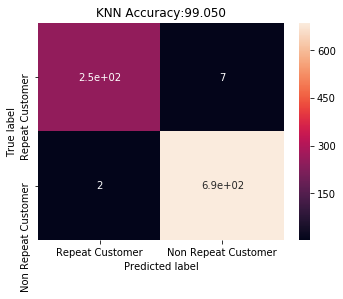

In [259]:
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('KNN Accuracy:{0:.3f}'.format(accuracy_test_knn))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [260]:
svm_clf = SVC()

In [261]:
svm_clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [262]:
svm_pred = svm_clf.predict(X_test)

In [263]:
svm_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [264]:
print(confusion_matrix(y_test, y_pred))

[[252   7]
 [  2 686]]


In [266]:
target_names = ['Repeat Customer','Non Repeat Customer']
print(classification_report(y_test, svm_pred, target_names=target_names))

                     precision    recall  f1-score   support

    Repeat Customer       0.99      1.00      0.99       259
Non Repeat Customer       1.00      1.00      1.00       688

        avg / total       1.00      1.00      1.00       947



In [267]:
accuracy_test_svm=round(svm_clf.score(X_test,y_test)*100,2)
accuracy_train_svm=round(svm_clf.score(X_train,y_train)*100,2)
accuracy_svm=round(accuracy_score(y_test, svm_pred)*100,2)
print('Training accuracy of SVM',accuracy_train_svm)
print('Testing accuracy of SVM',accuracy_test_svm)
print('Accuracy of SVM classifier:',accuracy_svm)

Training accuracy of SVM 99.95
Testing accuracy of SVM 99.58
Accuracy of SVM classifier: 99.58


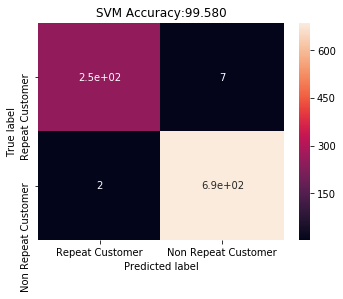

In [268]:
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Accuracy:{0:.3f}'.format(accuracy_test_svm))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()